<a href="https://colab.research.google.com/github/v2rinku/Lab-1-Quantum-Algorithm/blob/main/Hello_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Coding with Qiskit

# Hello World!

=
The application first entangled two qubits which were initially in the state $\vert00\rangle$. Then, we noted the results by running the application on a simulator as well as real quantum hardware at IBM.

This Jupyter notebook shows the code that was used in the video, as well as updates in the latest version of Qiskit.

**Link to Episode 3:** https://www.youtube.com/watch?v=RrUTwq5jKM4

# Building the circuit

We begin by importing Qiskit.

In [ ]:
!pip install qiskit qiskit_aer matplotlib pylatexenc qiskit_ibm_runtime


In [1]:
from qiskit import *

In the video, we initialized two qubits into a `QuantumRegister` and two classical bits into a `ClassicalRegister` by writing

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

Then we built a `QuantumCircuit` composed of the two classical and quantum bits by saying

In [3]:
circuit = QuantumCircuit(qr, cr)

The above three lines of code can be simplified into one line by writing

In [4]:
circuit = QuantumCircuit(2,2)

where the first argument is the number of quantum bits, and the second argument is the number of classical bits. This is the recommended way of creating circuits.

Once you create your circuit, you can draw it at any point by writing

In [5]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

For a plot based on `matplotlib`, use instead

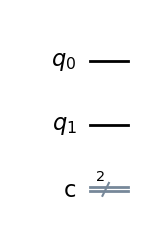

In [6]:
%matplotlib inline
circuit.draw(output='mpl')

Note that you only need to run the `%matplotlib inline` command once in your notebook.

Next, let's add the gates.

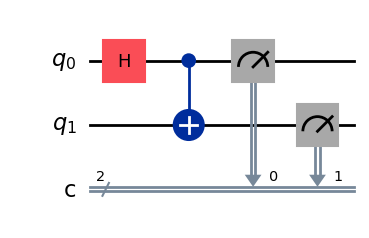

In [7]:
# the quantum circuit has two qubits. they are indexed as qubits 0 and 1
circuit.h(0)
circuit.cx(0,1) # order is control, target
circuit.measure([0,1], [0,1]) # qubits [0,1] are measured and results are stored in classical bits [0,1] in order
circuit.draw(output='mpl')

# Running on a simulator

We begin by setting the simulator to `qasm_simulator` from the Aer element of Qiskit.

In [8]:
from qiskit_aer import  Aer, QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(circuit, backend)


Then, we execute the circuit on the simulator and store the results in a variable called `result`.

In [9]:
job_sim = backend.run(circuit, shots=100)
result = job_sim.result()
counts = result.get_counts(circuit)
print(counts)

{'11': 49, '00': 51}


At this point, we are ready to plot the results of the simulator execution. To do this, first import the visualization tools from Qiskit using

In [10]:
from qiskit.visualization import plot_histogram

Then, we plot the results using

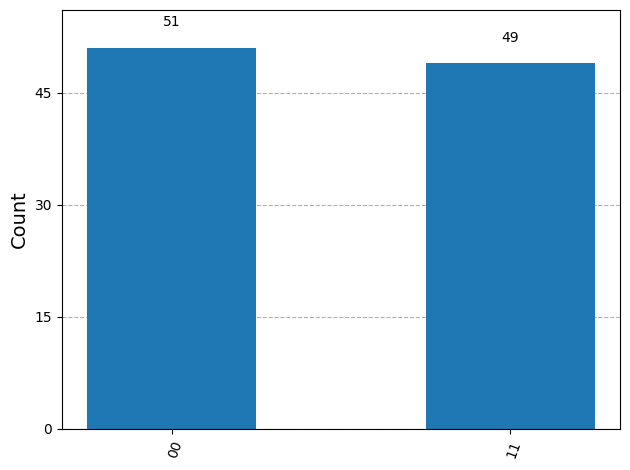

In [11]:
plot_histogram(result.get_counts(circuit))

# Running on real quantum hardware

In order to run the circuit on real quantum hardware at IBM, we begin by loading our saved IBMQ account using

In [47]:
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token="token",
    set_as_default=True,
    overwrite=True

)

service = QiskitRuntimeService("ibm_cloud")
print(service.backends())


qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-07-09 18:39:13,687: Default instance not set. Searching all available instances.
qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-07-09 18:39:14,422: Default instance not set. Searching all available instances.


[]


Once the backend is selected, we are ready to run the circuit just as before using the `execute` function. Before doing so, a useful feature is to run the job watcher that is available in the latest version of Qiskit using

# References

For detailed information about Qiskit, check out the tutorials in the Github repository:

https://github.com/Qiskit/qiskit-iqx-tutorials